# Technical Analysis using Pandas library [pandas-ta](https://pypi.org/project/pandas-ta/)

In [1]:
import pandas as pd
import pandas_ta as pta
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import time
%matplotlib inline

In [2]:
metrics_eth = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/eth_annual_metrics/combined.csv', index_col='time')
metrics_eth = metrics_eth.reset_index()
metrics_eth['time'] = pd.to_datetime(metrics_eth['time']).dt.date
metrics_eth = metrics_eth.set_index('time').drop(columns='Unnamed: 0')

metrics_eth.tail()

,asset,AdrActCnt,CapMVRVCur,CapMrktCurUSD,HashRate,NVTAdj,PriceUSD,SplyCur,TxCnt,TxTfrValAdjUSD,VelCur1yr
time,,,,,,,,,,,
2021-08-09,eth,515126,1.951959,3.695840e+11,580.355844,31.030022,3158.269216,1.170210e+08,1218594,1.191053e+10,22.280265
2021-08-10,eth,521467,1.938214,3.676737e+11,592.190498,44.894891,3141.723826,1.170293e+08,1212289,8.189655e+09,22.260330
2021-08-11,eth,524068,1.938669,3.708403e+11,571.476358,49.185052,3168.562989,1.170374e+08,1234409,7.539695e+09,22.249983
2021-08-12,eth,527453,1.875548,3.555929e+11,584.045015,43.633359,3038.061527,1.170460e+08,1195283,8.149565e+09,22.229124
2021-08-13,eth,522903,1.993139,3.882095e+11,580.968024,44.668383,3316.478942,1.170547e+08,1197050,8.690924e+09,22.204767


# Relative Strength Index - RSI

In [3]:
rsi_eth = pta.rsi(metrics_eth['PriceUSD'],length=14).dropna()
rsi_eth
rsi_eth.to_csv('resources/rsi_eth.csv')

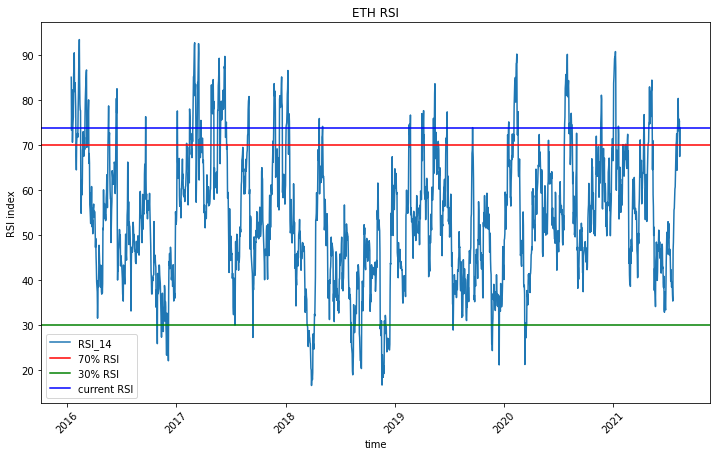

In [4]:
rsi_eth.plot(title = 'ETH RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_eth.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

In [5]:
metrics_btc = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/btc_annual_metrics/combined.csv', index_col='time')
metrics_btc = metrics_btc.reset_index()
metrics_btc['time'] = pd.to_datetime(metrics_btc['time']).dt.date
metrics_btc = metrics_btc.set_index('time').drop(columns='Unnamed: 0')

metrics_btc.tail()

,asset,AdrActCnt,CapMVRVCur,CapMrktCurUSD,HashRate,NVTAdj,PriceUSD,SplyCur,TxCnt,TxTfrValAdjUSD,VelCur1yr
time,,,,,,,,,,,
2021-08-09,btc,934412.0,2.303684,8.689260e+11,1.095346e+08,65.662747,46265.642456,1.878124e+07,254532.0,1.323317e+10,11.448542
2021-08-10,btc,875882.0,2.261489,8.543827e+11,1.189026e+08,108.761283,45488.791262,1.878227e+07,259626.0,7.855578e+09,11.449157
2021-08-11,btc,866724.0,2.268173,8.579470e+11,1.059314e+08,96.846956,45676.326361,1.878319e+07,261571.0,8.858792e+09,11.456478
2021-08-12,btc,842547.0,2.203437,8.341234e+11,1.088139e+08,116.853743,44405.748348,1.878413e+07,252677.0,7.138183e+09,11.438630
2021-08-13,btc,NaN,NaN,8.963739e+11,NaN,NaN,47717.485356,1.878502e+07,NaN,NaN,11.404661


In [6]:
rsi_btc = pta.rsi(metrics_btc['PriceUSD'],length=14).dropna()
rsi_btc
rsi_btc.to_csv('resources/rsi_btc.csv')

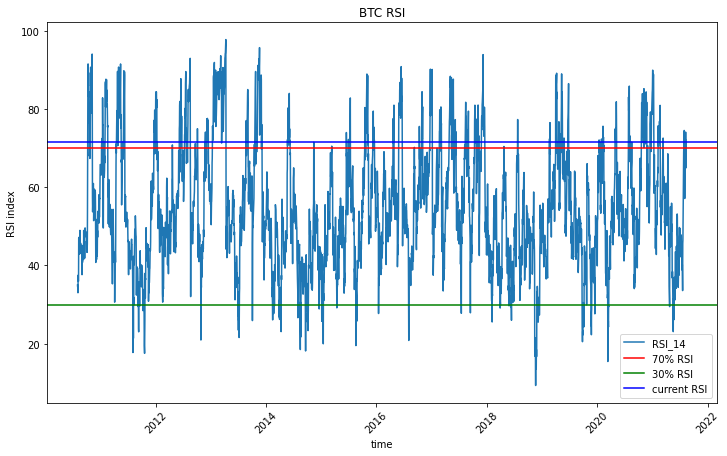

In [7]:
rsi_btc.plot(title = 'BTC RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_btc.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

# Rate of Change - ROC

In [8]:
roc_eth = pta.roc(metrics_eth['PriceUSD'],length=14).dropna()
roc_eth.to_csv('resources/roc_eth.csv')
roc_eth.head()

time
2016-01-15    40.257836
2016-01-16    27.558185
2016-01-17    36.974993
2016-01-18    54.341493
2016-01-19    43.544091
Name: ROC_14, dtype: float64

In [9]:
roc_btc = pta.roc(metrics_btc['PriceUSD'],length=14).dropna()
roc_btc.to_csv('resources/roc_btc.csv')
roc_btc.head()


time
2010-08-01   -28.821062
2010-08-02   -25.742574
2010-08-03   -19.700856
2010-08-04   -28.003890
2010-08-05     4.327433
Name: ROC_14, dtype: float64

# Stochastic RSI - STOCHRSI

In [10]:
stochrsi_btc = pta.stochrsi(metrics_eth['PriceUSD'],length=14).dropna()
stochrsi_btc.to_csv('resources/stochrsi_eth.csv')
stochrsi_btc.head()

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
time,,
2016-02-01,12.255849,30.743114
2016-02-02,7.610820,16.258663
2016-02-03,17.160092,12.342254
2016-02-04,27.179540,17.316817
2016-02-05,29.944141,24.761257


In [11]:
stochrsi_btc = pta.stochrsi(metrics_btc['PriceUSD'],length=14).dropna()
stochrsi_btc.to_csv('resources/stochrsi_btc.csv')
stochrsi_btc.head()

,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
time,,
2010-08-18,88.038824,84.486600
2010-08-19,86.971421,86.645592
2010-08-20,75.822128,83.610791
2010-08-21,70.962850,77.918800
2010-08-22,58.592519,68.459166


# Money Flow Index - MFI

In [12]:
eth_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/ETH-USD.csv', parse_dates=True, index_col='Date')
eth_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [13]:
btc_history = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/BTC-USD.csv', parse_dates=True, index_col='Date')
btc_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [14]:
mfi_eth = pta.volume.mfi(eth_history['High'],eth_history['Low'],eth_history['Close'], eth_history['Volume'])
mfi_eth.to_csv('resources/mfi_eth.csv')
mfi_eth.tail()

Date
2021-08-02    86.588695
2021-08-03    83.045474
2021-08-04    83.688864
2021-08-05    84.817144
2021-08-06    84.070572
Name: MFI_14, dtype: float64

In [15]:
mfi_btc = pta.volume.mfi(btc_history['High'],btc_history['Low'],btc_history['Close'], btc_history['Volume'])
mfi_btc.to_csv('resources/mfi_btc.csv')
mfi_btc.tail()

Date
2021-08-02    81.204203
2021-08-03    79.522234
2021-08-04    79.662530
2021-08-05    80.643163
2021-08-06    79.699408
Name: MFI_14, dtype: float64

# Stochastic Oscilator - STOCH

In [16]:
stoch_eth = pta.stoch(eth_history['Close'],eth_history['High'],eth_history['Low'],length=14).dropna()
stoch_eth.to_csv('resources/stoch_eth.csv')
stoch_eth.head()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2015-08-24,40.927698,47.422852
2015-08-25,15.583200,37.190149
2015-08-26,-9.154127,15.785590
2015-08-27,-16.621943,-3.397623
2015-08-28,-14.739759,-13.505276


In [17]:
stoch_btc = pta.stoch(btc_history['Close'],btc_history['High'],btc_history['Low'],length=14).dropna()
stoch_btc.to_csv('resources/stoch_btc.csv')
stoch_btc.head()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2014-10-04,-37.509344,-25.445139
2014-10-05,-48.047226,-35.980253
2014-10-06,-50.582789,-45.379786
2014-10-07,-39.987669,-46.205895
2014-10-08,-26.924530,-39.164996


# True Strength Index - TSI

In [18]:
tsi_eth = pta.tsi(metrics_eth['PriceUSD']).dropna()
tsi_eth.to_csv('resources/tsi_eth.csv')
tsi_eth.head()

,TSI_13_25_13,TSIs_13_25_13
time,,
2016-02-19,36.723593,55.155104
2016-02-20,33.186631,52.016751
2016-02-21,31.275368,49.053696
2016-02-22,32.410383,46.676080
2016-02-23,33.287523,44.763429


In [19]:
tsi_btc = pta.tsi(metrics_btc['PriceUSD']).dropna()
tsi_btc.to_csv('resources/tsi_btc.csv')
tsi_btc.head()

,TSI_13_25_13,TSIs_13_25_13
time,,
2010-09-05,-18.100723,-17.291109
2010-09-06,-18.088929,-17.405083
2010-09-07,-18.229348,-17.522835
2010-09-08,-18.453034,-17.655721
2010-09-09,-18.570205,-17.786361
